In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r"C:\Users\welcome\Documents\Book1.csv")
df

,Case_ID,Case_Type,Date,Verdict,Party_1,Party_2
0,3468031.0,"civilian,",11/12/2020,3year,Abdullah Saleh,"Saleh Mustafa,"
1,87506.0,criminal,21/05/2023,15year,Salma Mohammed,Ahmed Gharib
2,85220.0,"civilian,",13/04/2020,1year,Enas Mufarreh,Amin Mahmoud
3,5836.0,criminal,09/09/2023,innocence,Samah Ahmado,Aida Amin
4,638930.0,"civilian,",04/07/2024,4year,Omnia Salem,Fathia Amin
5,5832.0,criminal,08/05/2023,3year,Suha Majed,Mamdouh Habib
6,329.0,"civilian,",09/06/2020,7year,Qasim Ismail,Qasim Ahmed
7,NaN,criminal,08/03/2024,2year,Mohamed Abdullah,Nawal Al-Zoubi
8,528533.0,"civilian,",01/01/2023,innocence,Qasim Amin,Qasim Ahmed
9,74652.0,"civilian,",23/04/2023,5year,Mustafa Hosni,Haifa Ahmed


In [3]:
df.describe()

,Case_ID
count,9.000000e+00
mean,5.438743e+05
std,1.122118e+06
min,3.290000e+02
25%,5.836000e+03
50%,8.522000e+04
75%,5.285330e+05
max,3.468031e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Case_ID    9 non-null      float64
 1   Case_Type  10 non-null     object 
 2   Date       10 non-null     object 
 3   Verdict    10 non-null     object 
 4   Party_1    10 non-null     object 
 5   Party_2    10 non-null     object 
dtypes: float64(1), object(5)
memory usage: 612.0+ bytes


In [5]:
df.head()

,Case_ID,Case_Type,Date,Verdict,Party_1,Party_2
0,3468031.0,"civilian,",11/12/2020,3year,Abdullah Saleh,"Saleh Mustafa,"
1,87506.0,criminal,21/05/2023,15year,Salma Mohammed,Ahmed Gharib
2,85220.0,"civilian,",13/04/2020,1year,Enas Mufarreh,Amin Mahmoud
3,5836.0,criminal,09/09/2023,innocence,Samah Ahmado,Aida Amin
4,638930.0,"civilian,",04/07/2024,4year,Omnia Salem,Fathia Amin


In [6]:
df.tail()

,Case_ID,Case_Type,Date,Verdict,Party_1,Party_2
5,5832.0,criminal,08/05/2023,3year,Suha Majed,Mamdouh Habib
6,329.0,"civilian,",09/06/2020,7year,Qasim Ismail,Qasim Ahmed
7,NaN,criminal,08/03/2024,2year,Mohamed Abdullah,Nawal Al-Zoubi
8,528533.0,"civilian,",01/01/2023,innocence,Qasim Amin,Qasim Ahmed
9,74652.0,"civilian,",23/04/2023,5year,Mustafa Hosni,Haifa Ahmed


In [7]:
print(df.dtypes)

Case_ID      float64
Case_Type     object
Date          object
Verdict       object
Party_1       object
Party_2       object
dtype: object


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [10]:
df

,Case_ID,Case_Type,Date,Verdict,Party_1,Party_2
0,3468031.0,"civilian,",2020-12-11,3year,Abdullah Saleh,"Saleh Mustafa,"
1,87506.0,criminal,2023-05-21,15year,Salma Mohammed,Ahmed Gharib
2,85220.0,"civilian,",2020-04-13,1year,Enas Mufarreh,Amin Mahmoud
3,5836.0,criminal,2023-09-09,innocence,Samah Ahmado,Aida Amin
4,638930.0,"civilian,",2024-07-04,4year,Omnia Salem,Fathia Amin
5,5832.0,criminal,2023-05-08,3year,Suha Majed,Mamdouh Habib
6,329.0,"civilian,",2020-06-09,7year,Qasim Ismail,Qasim Ahmed
7,NaN,criminal,2024-03-08,2year,Mohamed Abdullah,Nawal Al-Zoubi
8,528533.0,"civilian,",2023-01-01,innocence,Qasim Amin,Qasim Ahmed
9,74652.0,"civilian,",2023-04-23,5year,Mustafa Hosni,Haifa Ahmed


In [11]:
df.dropna(inplace=True)

In [12]:
df['Case_Type'] = df['Case_Type'].str.replace(',', '')

In [13]:
df['Verdict'] = df['Verdict'].apply(lambda x: 0 if x == 'innocence' else int(x.replace('year', '')))

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
case_type_counts = df['Case_Type'].value_counts()
print(case_type_counts)

Case_Type
civilian     6
criminal     3
Name: count, dtype: int64


In [16]:
average_verdict = df['Verdict'].mean()
print(f"Average Verdict: {average_verdict} years")

Average Verdict: 4.222222222222222 years


In [17]:
df['Year'] = df['Date'].dt.year
cases_per_year = df['Year'].value_counts().sort_index()
print(cases_per_year)

Year
2020    3
2023    5
2024    1
Name: count, dtype: int64


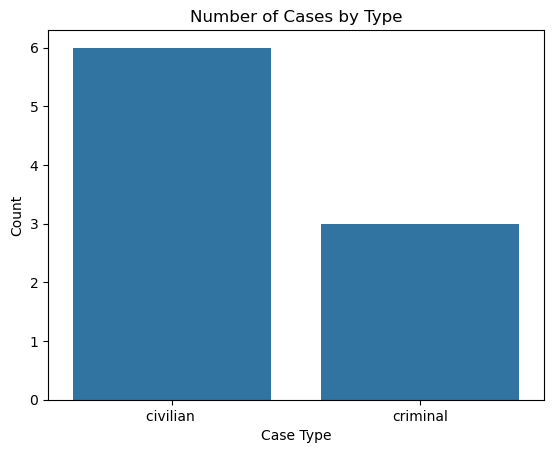

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Case_Type', data=df)
plt.title('Number of Cases by Type')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.show()

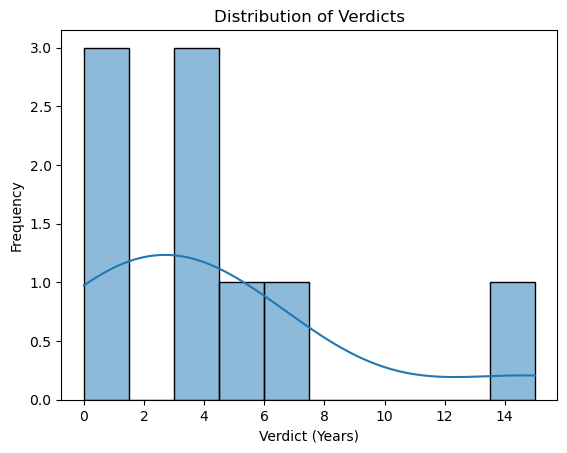

In [19]:
sns.histplot(df['Verdict'], bins=10, kde=True)
plt.title('Distribution of Verdicts')
plt.xlabel('Verdict (Years)')
plt.ylabel('Frequency')
plt.show()

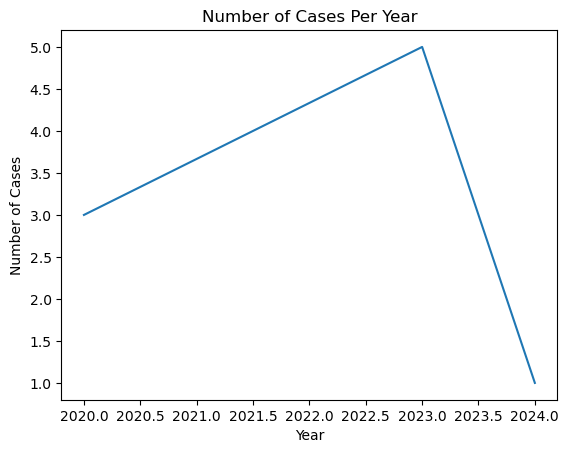

In [20]:
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values)
plt.title('Number of Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

In [21]:
from collections import Counter

parties = list(df['Party_1']) + list(df['Party_2'])
party_counts = Counter(parties)
print(party_counts.most_common(5))  # أكثر 5 أطراف تكرارًا

[('Qasim Ahmed', 2), ('Abdullah Saleh', 1), ('Salma Mohammed', 1), ('Enas Mufarreh', 1), ('Samah Ahmado', 1)]


In [22]:
verdict_by_type = df.groupby('Case_Type')['Verdict'].mean()
print(verdict_by_type)

Case_Type
civilian     3.333333
criminal     6.000000
Name: Verdict, dtype: float64


In [23]:
from collections import Counter

# جمع الأطراف
parties = list(df['Party_1']) + list(df['Party_2'])

# حساب التكرارات
party_counts = Counter(parties)

# أكثر 5 أطراف نشاطًا
most_active_parties = party_counts.most_common(5)
print("Most Active Parties:")
for party, count in most_active_parties:
    print(f"{party}: {count} cases")

Most Active Parties:
Qasim Ahmed: 2 cases
Abdullah Saleh: 1 cases
Salma Mohammed: 1 cases
Enas Mufarreh: 1 cases
Samah Ahmado: 1 cases


In [28]:
df

,Case_ID,Case_Type,Date,Verdict,Party_1,Party_2
0,3468031.0,"civilian,",11/12/2020,3,Abdullah Saleh,"Saleh Mustafa,"
1,87506.0,1,21/05/2023,15,Salma Mohammed,Ahmed Gharib
2,85220.0,"civilian,",13/04/2020,1,Enas Mufarreh,Amin Mahmoud
3,5836.0,1,09/09/2023,0,Samah Ahmado,Aida Amin
4,638930.0,"civilian,",04/07/2024,4,Omnia Salem,Fathia Amin
5,5832.0,1,08/05/2023,3,Suha Majed,Mamdouh Habib
6,329.0,"civilian,",09/06/2020,7,Qasim Ismail,Qasim Ahmed
7,NaN,1,08/03/2024,2,Mohamed Abdullah,Nawal Al-Zoubi
8,528533.0,"civilian,",01/01/2023,0,Qasim Amin,Qasim Ahmed
9,74652.0,"civilian,",23/04/2023,5,Mustafa Hosni,Haifa Ahmed


In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data FIRST
df = pd.read_csv(r"C:\Users\welcome\Documents\Book1.csv")  # Replace "your_data.csv" with your actual file name

# 2. Now you can use df
# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

imputer = SimpleImputer(strategy='mean')
df['Case_ID'] = imputer.fit_transform(df[['Case_ID']])

def convert_verdict(verdict):
    if verdict == 'innocence':
        return 0
    try:
        return int(verdict.split('year')[0])
    except:
        return None

df['Verdict'] = df['Verdict'].apply(convert_verdict)
df.dropna(subset=['Verdict'], inplace=True)

X = df[['Year', 'Month', 'Day', 'Case_ID', 'Case_Type']]  # Features
y = df['Verdict']  # Target

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_case_type = encoder.fit_transform(X[['Case_Type']])
encoded_df = pd.DataFrame(encoded_case_type, columns=encoder.get_feature_names_out(['Case_Type']))
X = pd.concat([X, encoded_df], axis=1)
X.drop('Case_Type', axis=1, inplace=True)

# 3. Train/Test Split (after preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 80.0
R^2 Score: -0.4222222222222223
